In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("crowdness_gym_data.csv")

In [32]:
df.isnull().sum()
df=df.drop("date",axis=1)

In [33]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


<AxesSubplot:>

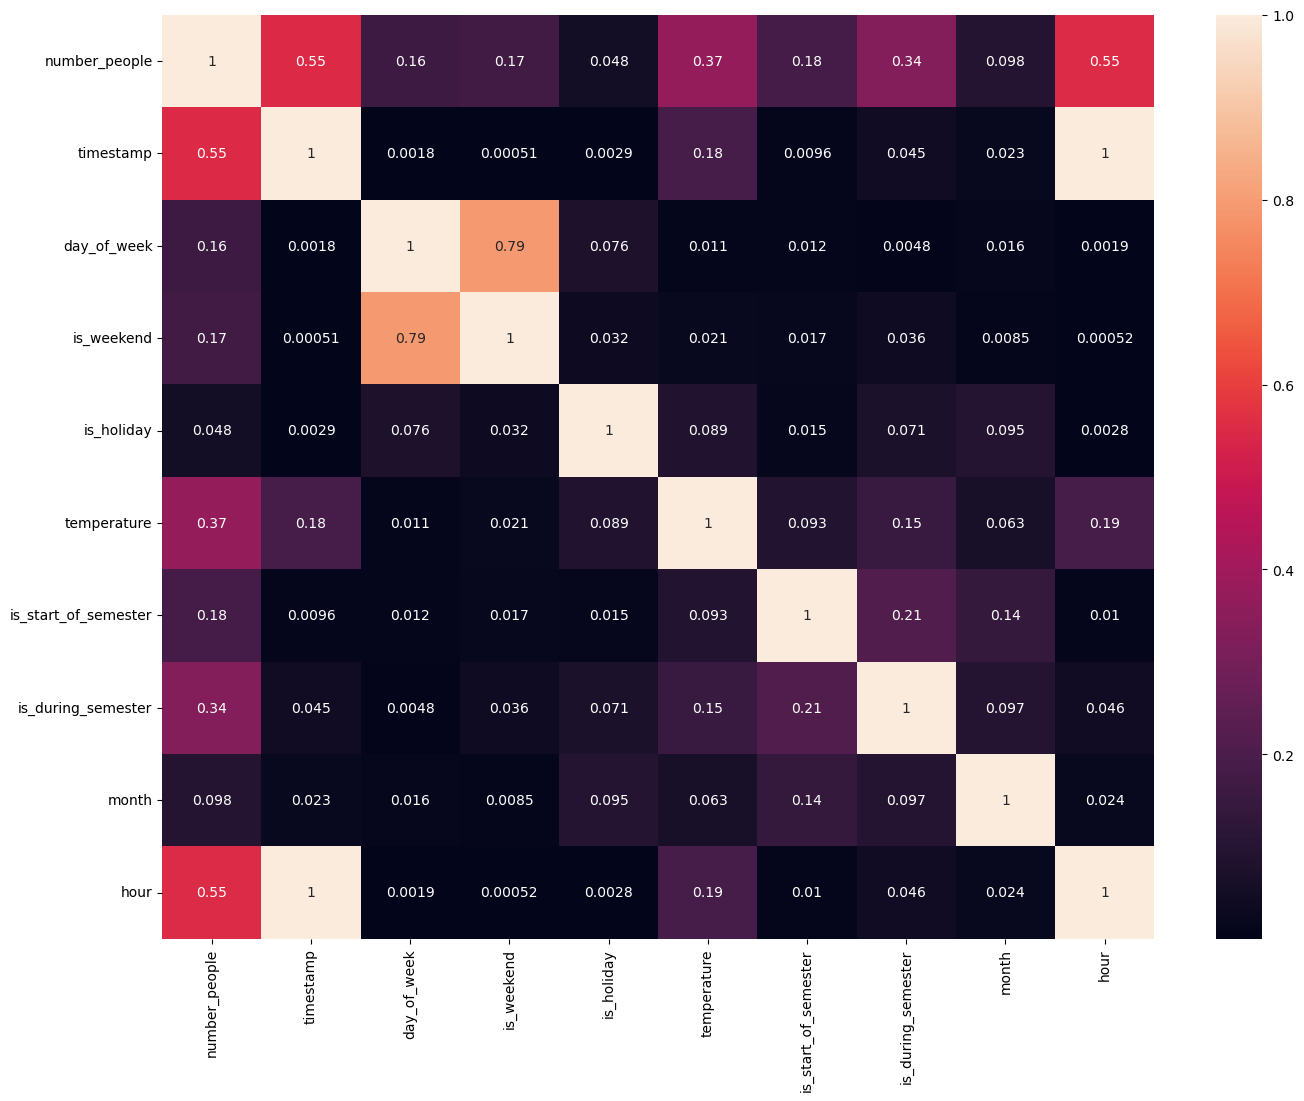

In [34]:
plt.figure(figsize=(16,12))
cor=abs(df.corr())
sns.heatmap(cor, annot=True)

The correlation with number of people is higher with the following columns: timestamp, temperature, is_during_semester and hour.

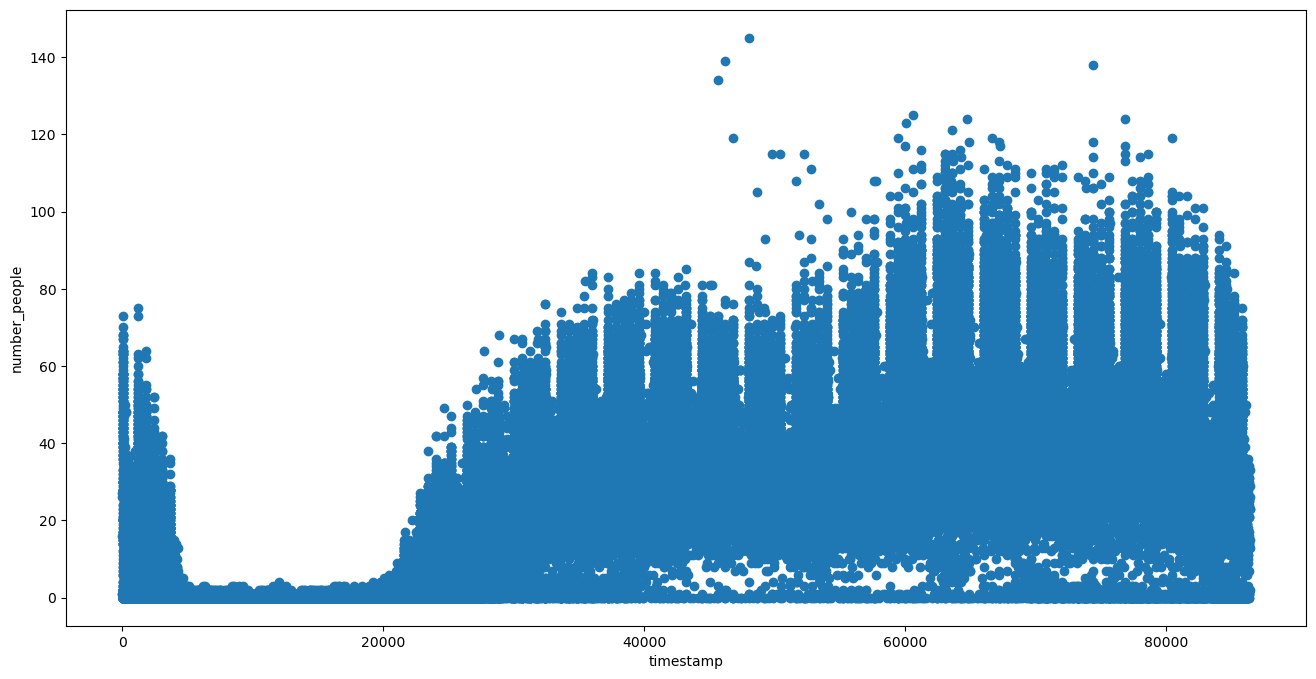

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(df["timestamp"], df["number_people"])
plt.xlabel("timestamp")
plt.ylabel("number_people")
plt.show()

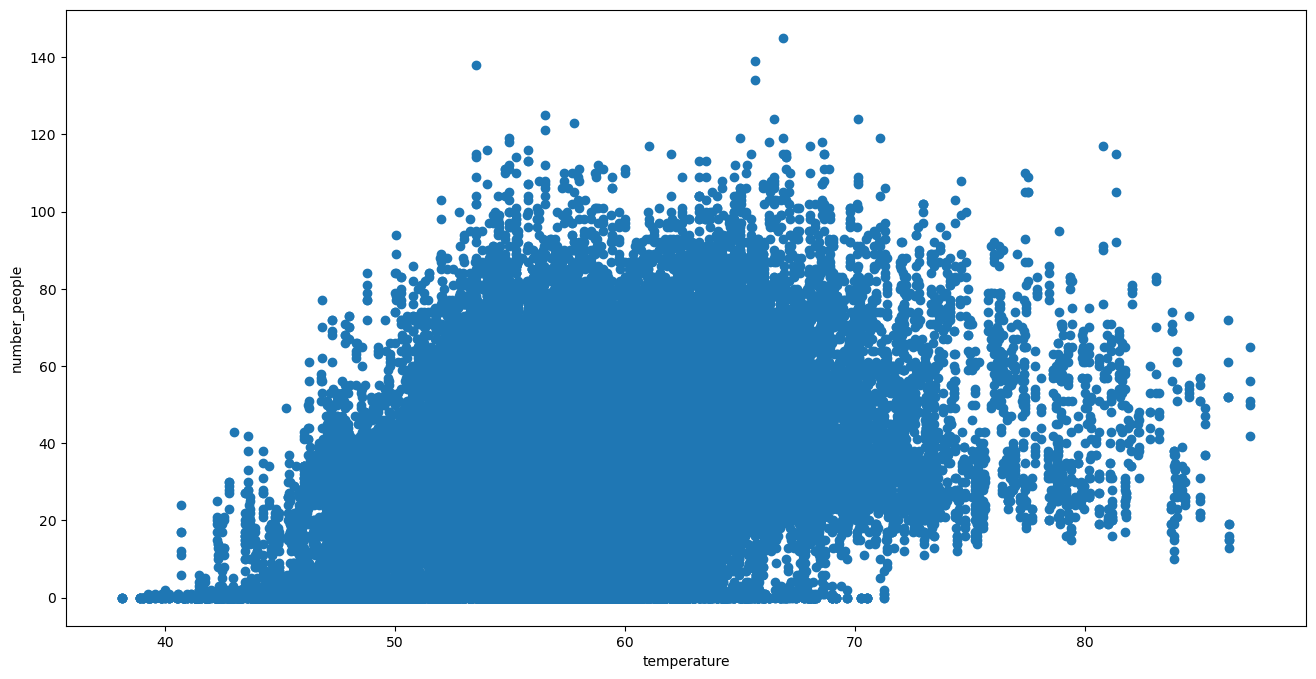

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(df["temperature"], df["number_people"])
plt.xlabel("temperature")
plt.ylabel("number_people")
plt.show()

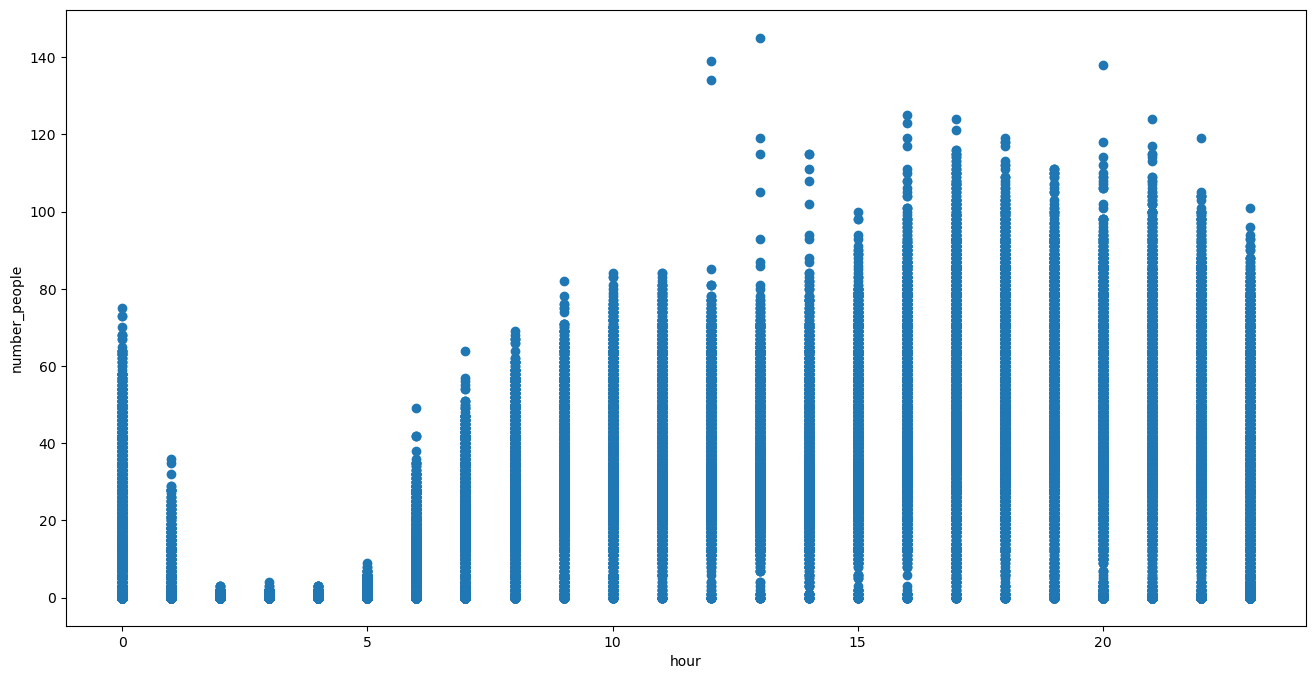

In [37]:
plt.figure(figsize=(16,8))
plt.scatter(df["hour"], df["number_people"])
plt.xlabel("hour")
plt.ylabel("number_people")
plt.show()

For the analysis, I will use the columns with a higher correlation (the one mentioned above). Even though, timestamp will be dropped because it has a similar correlation as hour column.

In [38]:
df=df.drop("timestamp", axis=1)
data=df.values
X=data[:,[1,4,5,6,8]]
y=data[:,0]

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=417)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
sgdr=SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)
sgdr.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [41]:
mse=mean_squared_error(y_test, sgdr.predict(X_test))
sgdr.coef_

array([-1.69930749,  0.71249704,  6.43312441,  9.61955823,  1.77502165])

In [42]:
mse

267.2102619183309

In [43]:
r2=r2_score(y_test, sgdr.predict(X_test))
r2

0.48032068571448583

The r2 is not so high. 

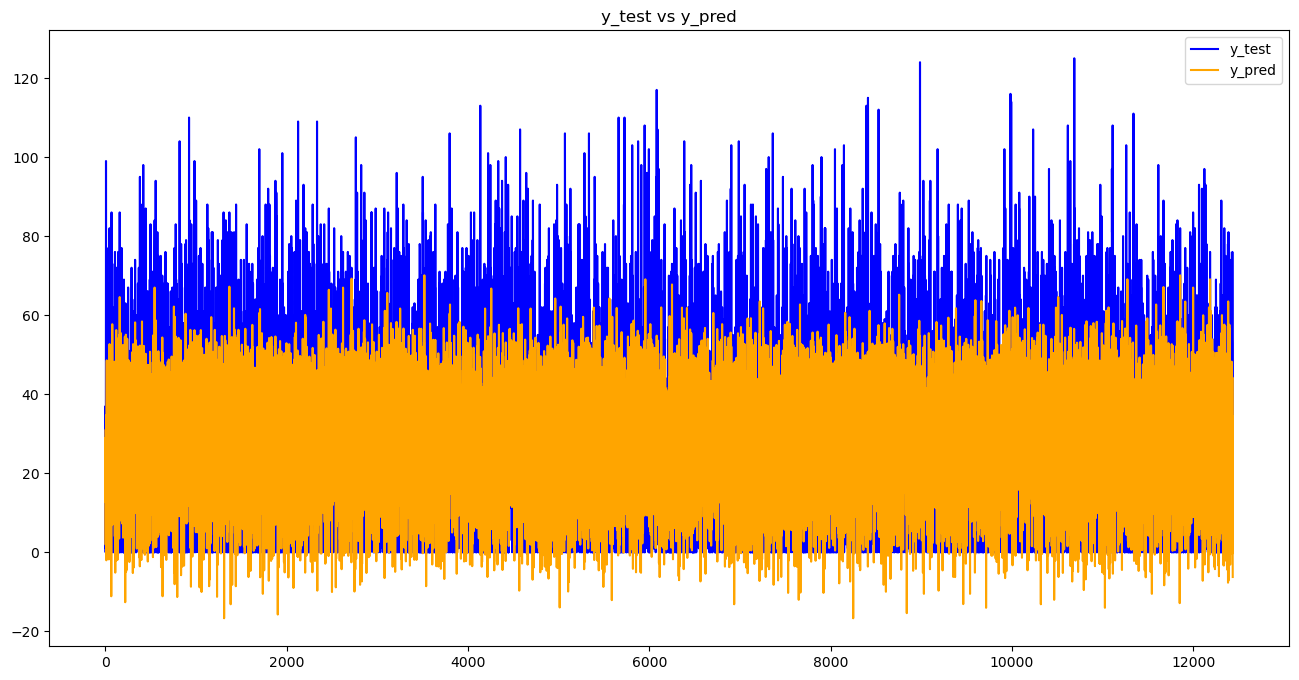

In [44]:
y_pred=sgdr.predict(X_test)
plt.figure(figsize=(16,8))
x_a=range(len(y_test))
plt.plot(x_a, y_test, color="blue", label="y_test")
plt.plot(x_a, y_pred, color="orange", label="y_pred")
plt.legend()
plt.title("y_test vs y_pred")
plt.show()

The model seems not the best one to predict when people usually go to the gim. Even though, it could be considered a good starting point. The best time, to go to the gim, it's during the morning. Also, it could be useful to add new parameters to the regression. When the semester starts or if it's during semester, for both the indicator rises so it doesn't change so much.